In [ ]:
! mamba install pandas==1.3.3
! mamba install numpy=1.21.2
! mamba install scipy=1.7.1-y
!  mamba install seaborn=0.11.2-y
!  mamba install matplotlib=3.4.3-y
!  mamba install statsmodels=0.12.0-y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pandas==1.3.3']

pkgs/main/noarch         [<=>                 ] (00m:00s) 
pkgs/main/noarch     

# Final Assignment

## Statistics For Data Science With Python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import f_oneway as F
from scipy.stats import levene as L
from scipy.stats import pearsonr as PR
from scipy.stats import ttest_ind as TT
import statsmodels.api as SM
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

**Displaying Information About Dataset**

In [4]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 4: Generate Descriptive Statistics and Visualizations

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

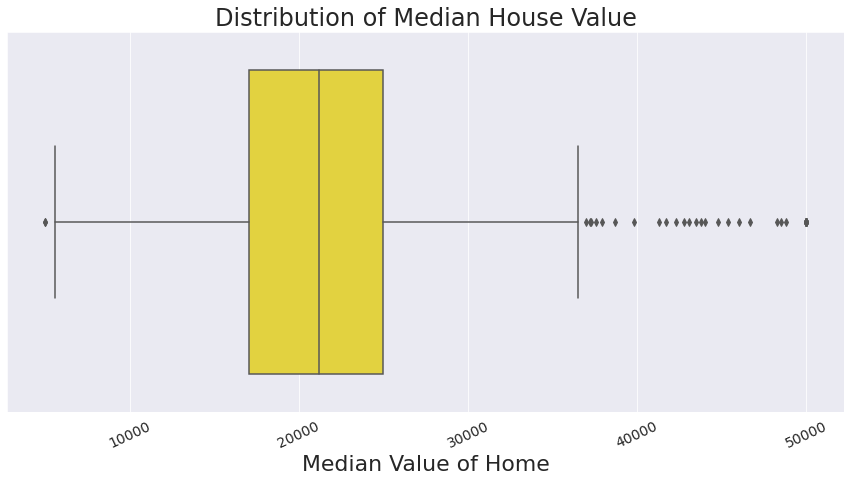

In [4]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 1, figsize = (15, 7))

sns.boxplot(x = boston_df['MEDV']*1000,
            color = '#FDE725')

#Title setup.
ax.set_title('Distribution of Median House Value', fontsize = 24)

#X-axis setup.
ax.set_xlabel("Median Value of Home", fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14, rotation = 25)


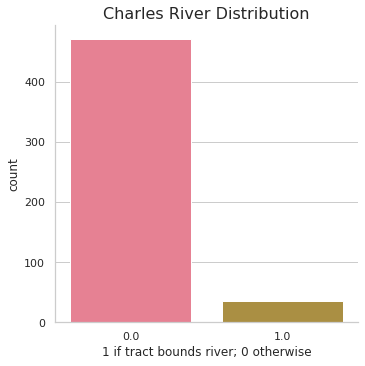

In [7]:
# styling of the plot
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(11.7,8.27)})


sns.catplot(x='CHAS', kind="count", data=boston_df)

# plot title
title="Charles River Distribution"

# increasing font size
plt.title(title, fontsize=16)
plt.xlabel("1 if tract bounds river; 0 otherwise")
plt.show()

## (to the Task 5) Answering the question

In [63]:
TT(boston_df[boston_df['CHAS'] == 1]['MEDV'],
   boston_df[boston_df['CHAS'] == 0]['MEDV'],
   equal_var = 'FALSE')

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: It appears the P-Value is less than the α value of 0.05. We can therefore reject the null hypothesis as there is a statistical difference in median value of houses bounded by the Charles river.

<br>

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [8]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
medv_age_df = boston_df[['MEDV', 'AGE']]
medv_age_df.loc[(medv_age_df["AGE"] <= 35),'AGE GROUPS'] = '35 And Younger'
medv_age_df.loc[(medv_age_df["AGE"] > 35) & (medv_age_df["AGE"]<70),'AGE GROUPS'] = 'Between 35 and 70'
medv_age_df.loc[(medv_age_df["AGE"] >= 70),'AGE GROUPS'] = '70 And Older'
medv_age_df.head()

,MEDV,AGE,AGE GROUPS
0,24.0,65.2,Between 35 and 70
1,21.6,78.9,70 And Older
2,34.7,61.1,Between 35 and 70
3,33.4,45.8,Between 35 and 70
4,36.2,54.2,Between 35 and 70


Text(0.5, 1.0, 'Distribution of MEDV Values by Age Groups')

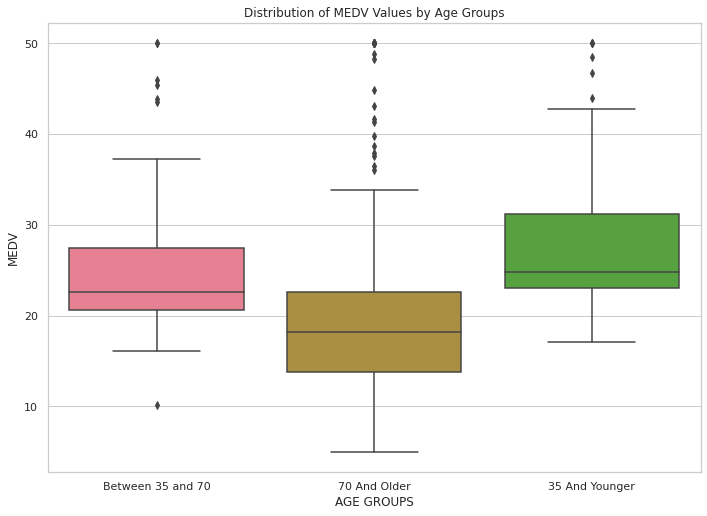

In [10]:
sns.boxplot(x='AGE GROUPS', y='MEDV', data=medv_age_df)
plt.title("Distribution of MEDV Values by Age Groups")

## (to the Task 5) Answering the question

In [11]:
proportion1 = medv_age_df[medv_age_df['AGE GROUPS'] == "35 And Younger"]['MEDV']
proportion2 = medv_age_df[medv_age_df['AGE GROUPS'] == "Between 35 and 70"]['MEDV']
proportion3 = medv_age_df[medv_age_df['AGE GROUPS'] == "70 And Older"]['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(proportion1, proportion2, proportion3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Conclusion: It appears the P-Value is less than the α value of 0.05. We can therefore reject the null hypothesis as there is a statistical difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

<br>

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

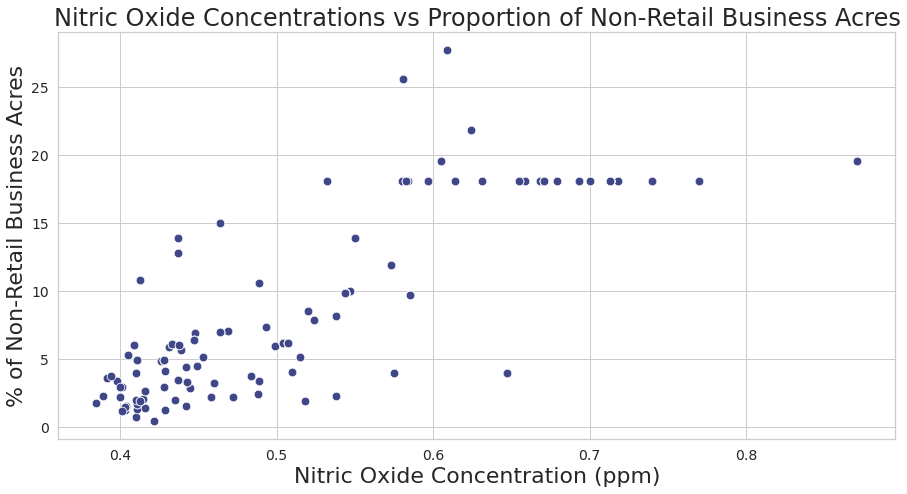

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7.5))

sns.scatterplot(x = boston_df['NOX'],
                y = boston_df['INDUS'],
                s = 75,
                color = '#404788')

#Title setup.
ax.set_title('Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres', fontsize = 24)

#X-axis setup.
ax.set_xlabel("Nitric Oxide Concentration (ppm)", fontsize = 22)
#Y-axis setup.
ax.set_ylabel("% of Non-Retail Business Acres", fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

## (to the Task 5) Answering the question

In [18]:
PR(boston_df['NOX'],
   boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

### Conclusion: Since in this case the P-value is very small and < α = 0.05, we can conclude that there is a correlation between Nitric oxide concentration and proportion of non-retail business acres per town.

<br>

## Create a histogram for the pupil to teacher ratio variable

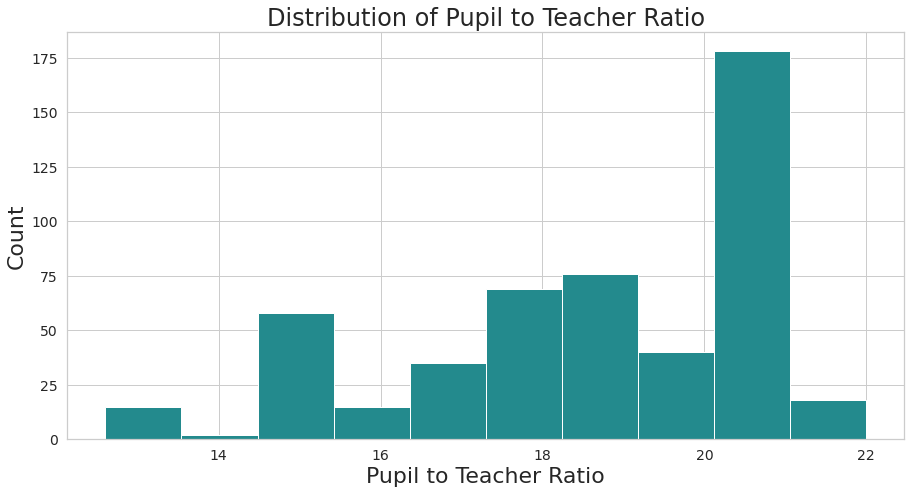

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7.5))

plt.hist(x = 'PTRATIO',
             data=boston_df,
             color = '#238A8D')
             

#Title setup.
ax.set_title('Distribution of Pupil to Teacher Ratio', fontsize = 24)

#X-axis setup.
ax.set_xlabel("Pupil to Teacher Ratio", fontsize = 22)
#Y-axis setup.
ax.set_ylabel("Count", fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

### NOTE: Histogram is visible on Jupyter Notebook but somehow diappears when uploaded to GitHub. Please, be understndable.

<br>

## Last one for Task 5

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']*1000
X = SM.add_constant(X)

model = SM.OLS(y,X).fit()
pred = model.predict(X)

model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        11:55:26   Log-Likelihood:                -5319.2
No. Observations:                 506   AIC:                         1.064e+04
Df Residuals:                     504   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.839e+04    817.389     22.499      0.000    1.68e+04       2e+04
DIS         1091.6130    188.378      5.795      0.000     721.509    1461.717
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we already know, the value for the Pearson Correlation is the square root of the value  R2 .

#### 0.24899799195977465  is a positive value closer to 0 than 1. Therefore there is a weak positive correlation between the additional weighted distance to the five Boston employment centres on and the median value of owner occupied homes.

<br>

# THE END